# Machine Learning 101

In [1]:
import sklearn

In [3]:
#Scikit-learn comes with a few small standard datasets that do not require 
#to download any file from some external website 
from sklearn.datasets import load_iris

In [5]:
#Here we load out dataset into iris 
iris = load_iris()

In [6]:
#This is the data collected about every iris(flower) or the features of the flower
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
#This is what we will classify every iris(flower) as
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
#This is an example of data for one iris
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [9]:
#This is an example of what this flower classifies as 
#0 -> Setosa 
#1 -> Versicolor 
#2 -> Virginica
iris.target[0]


0

In [ ]:
import numpy as np 

#We are splitting our data into two segments, training data and testing data 
#So, we can train our classifier and test it's accuracy 

#We are taking three data points from the iris data set to store in the test data set. 
#The rest of the points will remain in our training data set

test_idx = [0,50,100]

#training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

#testing data 
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

In [11]:
#Imagine a DecisionTreeClassifier to be a box of rules
clf = tree.DecisionTreeClassifier()

#Imagine this to be a learning algorithm to find patterns from your training data
clf.fit(train_data,train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree._tree import TREE_LEAF
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [41]:
def print_decision_tree(model):
    # Taken from https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
    dot_data = StringIO()

    export_graphviz(model, out_file=dot_data,  
                    feature_names=iris.feature_names,
                    class_names=iris.target_names,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

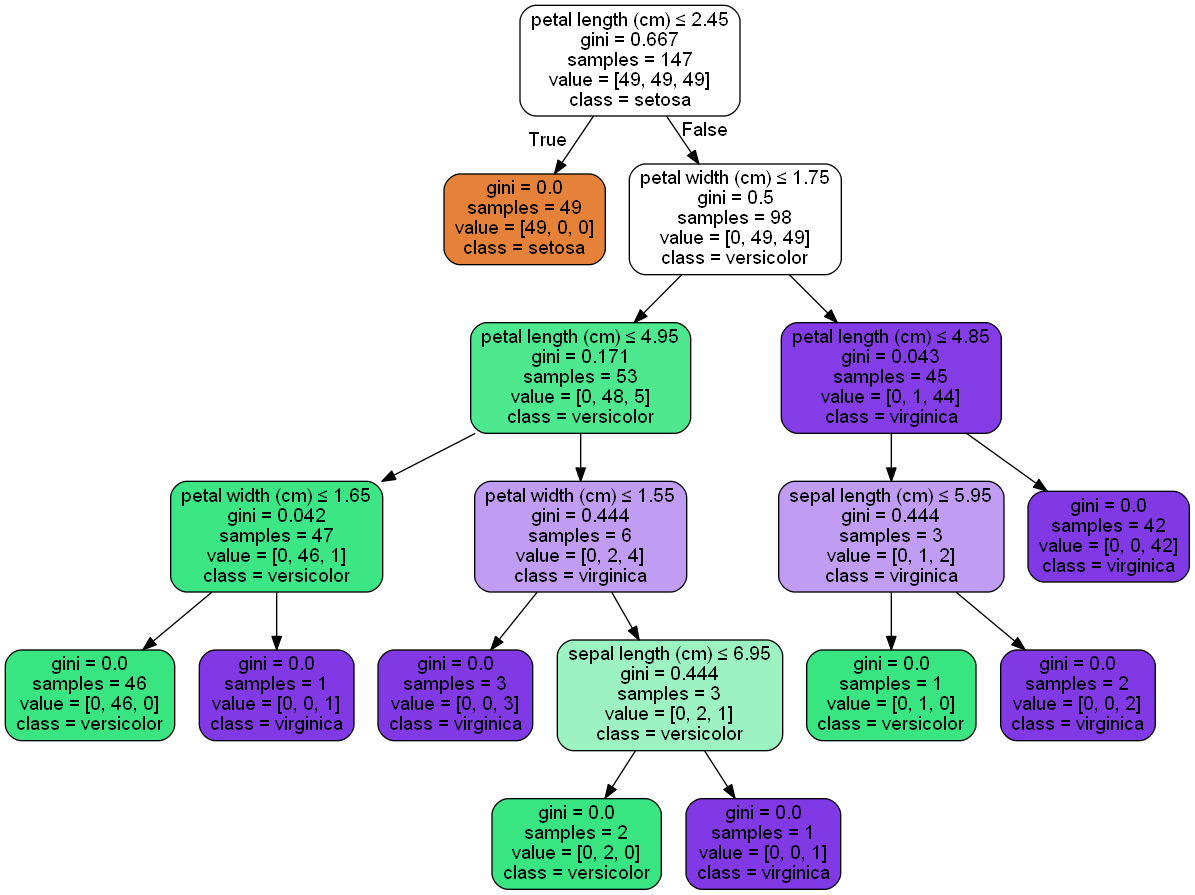

In [42]:
print_decision_tree(clf)

In [32]:
#Follow along the Decision Tree Classifier to see whether it can 
#accurately predict the test data 

#Remember the features are in order of: 
#sepal length, sepal width, petal length, petal width
test_data

array([[5.1, 3.5, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.3, 3.3, 6. , 2.5]])

In [43]:
#This is what the classifier predicts the test data will be 
#0 -> Setosa 
#1 -> Versicolor 
#2 -> Virginica
clf.predict(test_data)

array([0, 1, 2])

In [44]:
#What the actual test data is
test_target

array([0, 1, 2])